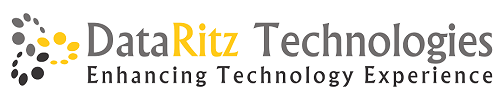

# Topics to be covered

* Data Loading, Storage & File Formats: 
    * Reading & Writing Data in Text Format
    * Binary Data Formats
    * Interacting with Web APIs
    * Interacting with Databases

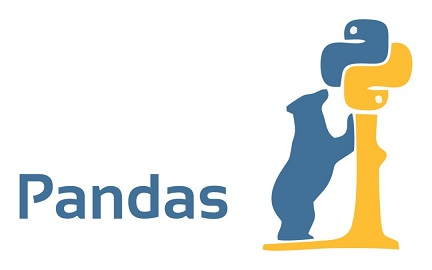

In [1]:
import pandas as pd

# Reading and Writing Data in Text Format

In [2]:
real_data = pd.read_csv('House_Data.csv')
real_data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


##### To read this file, you have a couple of options. 
##### You can allow pandas to assign default column names, or you can specify names yourself

In [3]:
real_data = pd.read_csv('House_Data.csv',header = None)
real_data.head()

,0,1,2,3,4,5,6,7,8
0,area_type,availability,location,size,society,total_sqft,bath,balcony,price
1,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
2,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120
3,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3,62
4,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95


In [4]:
Col_name = list('abcdefgh')
real_data = pd.read_csv('House_Data.csv',names=Col_name)
real_data.head()

,a,b,c,d,e,f,g,h
area_type,availability,location,size,society,total_sqft,bath,balcony,price
Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2,1,39.07
Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120
Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2,3,62
Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3,1,95


# Column as an  index of the returned DataFrame

In [5]:
real_data = pd.read_csv('House_Data.csv',index_col='area_type')
real_data.head()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Skiping rows while loading

In [8]:
real_data = pd.read_csv('House_Data.csv',skiprows=[0,1])
real_data.head()

,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5,3,120
0,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.0
1,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.0
2,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.0
3,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.0
4,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.0


# Binary Data Formats

* One of the easiest ways to store data efficiently in binary format is using Python’s built-in pickle serialization. 

* pandas objects all have a to_pickle() method that writes the data to disk in pickle format

In [9]:
data = pd.read_csv('House_Data.csv')

In [10]:
data.to_pickle('House_Data_pickle')

In [11]:
# We can read any “pickled” object stored in a file by using 
#the built-in pickle directly 
r = pd.read_pickle('House_Data_pickle')
r.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Note - 

* Pickle is only recommended as a short-term storage format.
* The problem is that it is hard to guarantee that the format will be stable over time; an object pickled today may not unpickle with a later version of a library.

# Reading Microsoft Excel Files

In [14]:
xls = pd.read_excel('House_Data_xls.xlsx','Sheet1')
xls.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,2020-12-19 00:00:00,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [15]:
xls = pd.read_excel('House_Data_xls.xlsx','Sheet2')
xls.head()

,total_sqft,bath,balcony,price
0,1056,2.0,1.0,39.07
1,2600,5.0,3.0,120.00
2,1440,2.0,3.0,62.00
3,1521,3.0,1.0,95.00
4,1200,2.0,1.0,51.00


# Read Data from api

# https://documenter.getpostman.com/view/10808728/SzS8rjbc?version=latest#b07f97ba-24f4-4ebe-ad71-97fa35f3b683

In [34]:
import http.client
import mimetypes
conn = http.client.HTTPSConnection("api.covid19api.com")
payload = ''
headers = {}
conn.request("GET", "/country/south-africa/status/confirmed/live", payload, headers)
res = conn.getresponse()
data = res.read()
x = data.decode("utf-8")
x = pd.read_json(x)

In [35]:
x.head()

,Cases,City,CityCode,Country,CountryCode,Date,Lat,Lon,Province,Status
0,0,,,South Africa,ZA,2020-01-22,-30.56,22.94,,confirmed
1,0,,,South Africa,ZA,2020-01-23,-30.56,22.94,,confirmed
2,0,,,South Africa,ZA,2020-01-24,-30.56,22.94,,confirmed
3,0,,,South Africa,ZA,2020-01-25,-30.56,22.94,,confirmed
4,0,,,South Africa,ZA,2020-01-26,-30.56,22.94,,confirmed


# Interacting with Databases

In [49]:
import mysql.connector as sql

import pandas as pd

db_connection = sql.connect(host='localhost', database='test', user='root')

df = pd.read_sql('SELECT * FROM pandas', con=db_connection)

In [50]:
df

,a,b,c,d
0,abc,xyz,123,abc
1,abc,xyz,123,abc
2,,,,
3,asadda,adada,3113,mcbjbcjz
4,asadda,adada,3113,mcbjbcjz
5,,,,
6,,,,
7,mmmmm,jbjbj,12333,"m,bmbm"
8,test,test,1111,test
9,,,,
